In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
import gseapy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bioservices         1.7.11
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs              NA
gseapy              0.10.4
h5py                2.10.0
idna                2.10
igraph     

In [3]:
heart_infection_sc = sc.read_h5ad(filename="./../pyobjs_github/heart_infection_sc.h5ad")

In [5]:
endothelial = heart_infection_sc.raw.to_adata()[heart_infection_sc.obs["celltype_groups"].isin(["Endothelial cells"])]
endothelial

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 11349 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'dendrogram_leiden_0.5', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_leiden_0.3', 'rank_genes_groups_leiden_0.5', 'umap'

In [6]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [7]:
sc.pp.filter_genes(endothelial, min_cells = 10)
sc.pp.highly_variable_genes(endothelial, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(endothelial, )
sc.tl.score_genes_cell_cycle(endothelial, s_genes=s_genes, g2m_genes=g2m_genes)
endothelial.raw = endothelial
endothelial = endothelial[:, endothelial.var.highly_variable]
sc.pp.regress_out(endothelial, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(endothelial, max_value=10)
sc.tl.pca(endothelial, svd_solver='arpack')
# sc.pl.pca_variance_ratio(endothelial, n_pcs = 50, log=True)
sc.pp.neighbors(endothelial, n_pcs=20)
sc.tl.umap(endothelial)
sc.tl.leiden(endothelial, key_added="endo_leiden_0.5", resolution = 0.5)
sc.tl.leiden(endothelial, key_added="endo_leiden_0.3", resolution = 0.3)

filtered out 4490 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    545 total control genes are used. (0:00:00)
computing score 'G2M_score'


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    627 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']


/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:10)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 11 clusters and added
    'endo_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 7 clusters and added
    'endo_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:01)


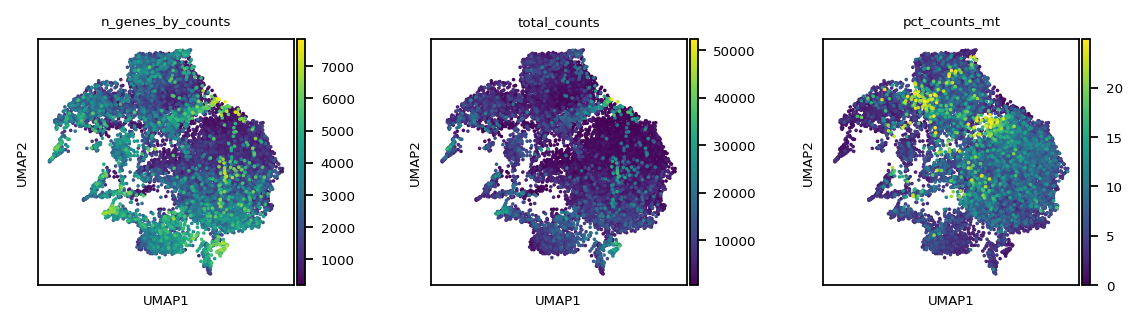

In [8]:
sc.pl.umap(endothelial, color = ['n_genes_by_counts', 'total_counts', "pct_counts_mt"], ncols=3)

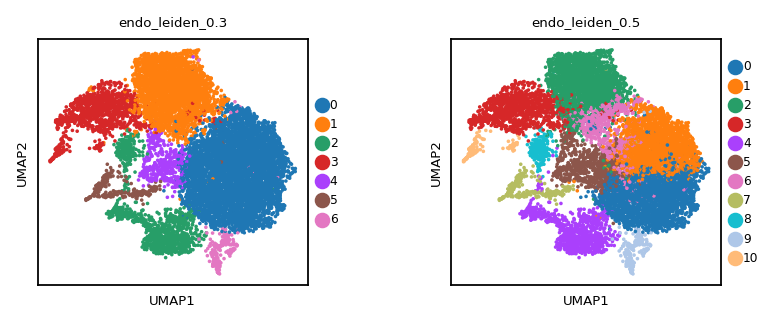

In [9]:
sc.pl.umap(endothelial, color = ["endo_leiden_0.3", "endo_leiden_0.5"])

In [10]:
sc.tl.rank_genes_groups(endothelial, groupby='endo_leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_endo_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_endo_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)


In [12]:
pd.DataFrame(endothelial.uns['rank_genes_groups_endo_leiden_0.5']["names"]).head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,Aplnr,mt-Rnr1,Bst2,Ly6a,Rgs5,Cxcl12,H2afz,Col3a1,Rgs5,Hba-a1,Tyrobp
1,Aqp1,mt-Rnr2,Ifitm3,H2-D1,Ndufa4l2,Tm4sf1,Stmn1,Dcn,Ndufa4l2,Hbb-bs,Fcer1g
2,Cavin2,mt-Cytb,Isg15,B2m,Pdgfrb,Rbp7,Hist1h1e,Col1a1,Colec11,Hba-a2,Cd52
3,Ahnak,Gm42418,B2m,Cxcl9,Tpm2,Slc6a6,Hist1h1b,Col1a2,Higd1b,Hbb-bt,Plac8
4,Nrp2,Tmsb4x,H2-K1,H2-K1,Kcnj8,Cdkn1c,Hmgb2,Postn,Postn,Alas2,Cebpb
5,Pcdh17,mt-Nd2,Iigp1,Gbp2,Higd1b,Ltbp4,Top2a,Lum,Kcnj8,Snca,Coro1a
6,Adgrl4,mt-Nd1,H2-D1,AW112010,Abcc9,Gja4,Tubb5,Fstl1,Cygb,Rgs5,Lgals3
7,Sptbn1,Calm1,Irf7,H2-T23,Cygb,Col18a1,Mki67,Dpt,Abcc9,Bpgm,Ifi27l2a
8,Rflnb,Cd34,Gbp7,H2-Q7,Colec11,Ptprb,Pclaf,Gsn,Tpm2,Mkrn1,S100a6
9,Ctnnb1,Sparcl1,Rsad2,Ubd,Gucy1a1,Glul,Birc5,Col5a1,Aspn,Colec11,Lyz2


In [ ]:
# Remove doublet populations or misclustered populations (expressing markers of other cell types)
# Cluster 7 expresses fibroblast markers: Col3a1, Dcn, COl1a1, Col2a1, Postn
# Cluster 4 and 8 expresses mesenchymal pericyte cell markers: Rgs5, Postn,, Kcnj8, etc 
# Cluster 9 represents erythroblasts 
# CLuster 10 repsents immune cell population

In [13]:
# Selecting endothelial cells
endothelial_only = endothelial[endothelial.obs["endo_leiden_0.5"].isin(["0", "1", "2", "3", "5", "6"])]

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


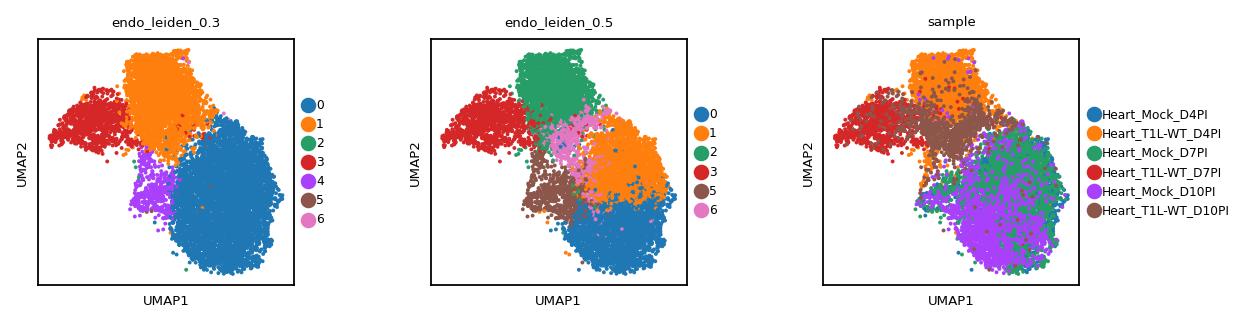

In [15]:
sc.pl.umap(endothelial_only, color = ["endo_leiden_0.3", "endo_leiden_0.5", "sample"])

In [16]:
endothelial_only.obs["cell_phenotypes"] = endothelial_only.obs["endo_leiden_0.3"]
phenotypes = {'0': "Venous ECs", 
                '1': "Inflamed ECs", 
                '3': "Cxcl9-high ECs",
                '4': "Arterial ECs"}
endothelial_only.obs["cell_phenotypes"] = endothelial_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [17]:
sc.tl.rank_genes_groups(endothelial_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


In [18]:
pd.DataFrame(endothelial_only.uns['rank_genes_groups_cell_phenotypes']["names"]).head(10)

,Arterial ECs,Cxcl9-high ECs,Inflamed ECs,Venous ECs
0,Cxcl12,Ly6a,Bst2,mt-Cytb
1,Tm4sf1,Cxcl9,H2-K1,Sparcl1
2,Gja4,Gbp2,B2m,mt-Nd4
3,Fn1,H2-D1,Ifitm3,Col4a1
4,Stmn2,B2m,Isg15,Aplnr
5,Rbp7,AW112010,H2-D1,Marcks
6,Sox17,Ubd,Iigp1,Cd34
7,Glul,H2-K1,H2-Q7,Calm1
8,Slc6a6,H2-T23,Xist,mt-Nd2
9,Ltbp4,Serpina3g,Gbp7,Col4a2


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_phenotypes']`


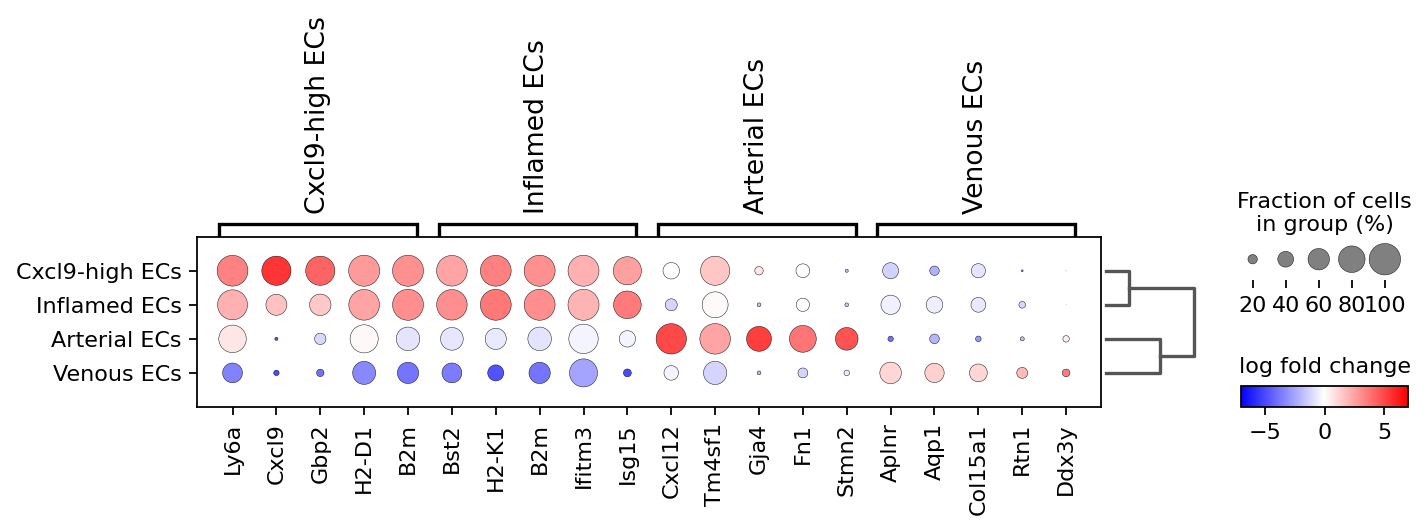

In [19]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(endothelial_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr')

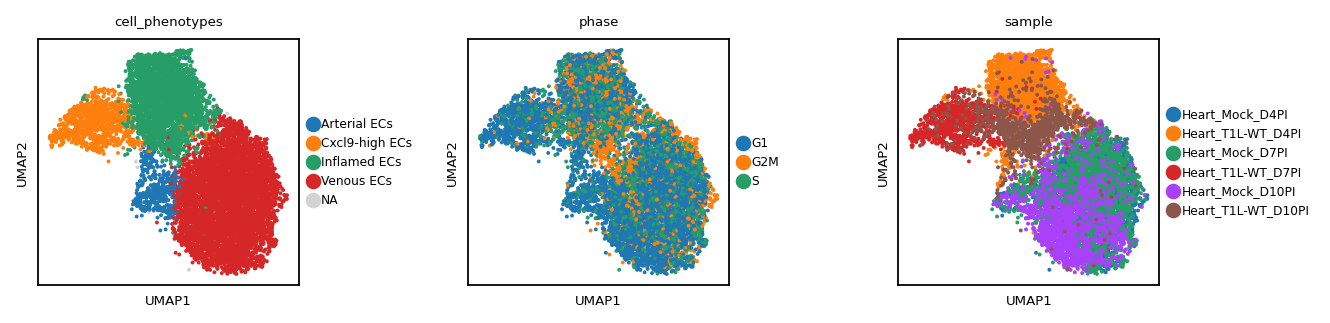

In [20]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.umap(endothelial_only, color = ["cell_phenotypes", "phase", "sample" ], wspace=0.5)

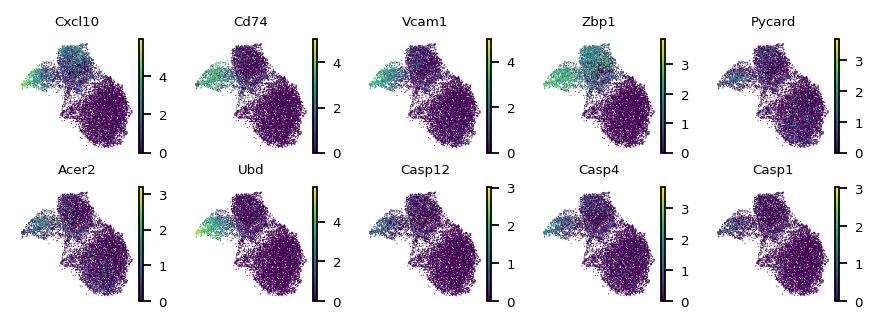

In [24]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1, 1), transparent=True, format="pdf")
sc.pl.umap(endothelial_only, color = ["Cxcl10", "Cd74", "Vcam1", "Zbp1", "Pycard", "Acer2", "Ubd", "Casp12", "Casp4" , "Casp1"], size=1, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=5, frameon=False, add_outline=False)


In [25]:
# endothelial_only.write_h5ad("./../pyobjs_github/endothelial_only.h5ad")

In [33]:
endothelial_only = sc.read_h5ad("./../pyobjs/endothelial_only.h5ad")

In [36]:
sc.tl.rank_genes_groups(endothelial_only, groupby="endo_leiden_0.3", groups=["1"], reference="0", key_added="inflamed_endo_markers")
sc.tl.rank_genes_groups(endothelial_only, groupby="endo_leiden_0.3", groups=["3"], reference="1", key_added="Cxcl_high_markers")

ranking genes
    finished: added to `.uns['inflamed_endo_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['Cxcl_high_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [37]:
inflamed_endo_markers = sc.get.rank_genes_groups_df(endothelial_only, group="1", key="inflamed_endo_markers")
# inflamed_endo_markers.to_csv("./../csvs/endothelial_only_inflamed_endo_markers.csv")
print(inflamed_endo_markers)

         names      scores  logfoldchanges          pvals      pvals_adj
0        H2-K1  144.621689        4.910536   0.000000e+00   0.000000e+00
1          B2m  119.417564        3.950338   0.000000e+00   0.000000e+00
2        Iigp1  100.071770        6.200867   0.000000e+00   0.000000e+00
3         Bst2   98.428940        3.833832   0.000000e+00   0.000000e+00
4        H2-Q7   93.869003        6.185669   0.000000e+00   0.000000e+00
...        ...         ...             ...            ...            ...
18262  Col15a1  -16.367277       -0.977219   3.965159e-59   5.748536e-57
18263  mt-Cytb  -17.493038       -0.462137   1.189722e-66   1.906373e-64
18264     Rtn1  -17.999151       -1.551222   4.520787e-71   7.576258e-69
18265  Eif2s3y  -24.142366       -8.152443  1.456397e-122  3.695000e-120
18266    Ddx3y  -28.736406       -9.296165  2.452243e-169  7.999131e-167

[18267 rows x 5 columns]


In [38]:
Cxcl9_markers = sc.get.rank_genes_groups_df(endothelial_only, group="3", key="Cxcl_high_markers")
# Cxcl9_markers.to_csv("./../csvs/endothelial_only_Cxcl9_high_markers.csv")
print(Cxcl9_markers)

           names     scores  logfoldchanges          pvals      pvals_adj
0            Ubd  49.943439        6.401490  3.436328e-290  4.540535e-286
1          Cxcl9  44.669479        3.674404  4.971298e-290  4.540535e-286
2      Serpina3g  44.510616        4.190354  6.019766e-264  2.749077e-260
3       Serping1  42.228561        3.740915  8.262979e-253  3.018797e-249
4           Cd74  41.702118        5.038699  7.092245e-238  1.850772e-234
...          ...        ...             ...            ...            ...
18262        H19 -21.464224       -3.628367   1.252323e-96   4.765873e-94
18263     mt-Nd1 -21.927967       -1.137646   8.256048e-94   3.077821e-91
18264      Stmn1 -21.950451       -2.079191   1.299727e-99   5.276026e-97
18265      Ltbp4 -29.643248       -2.457998  5.272757e-170  5.665733e-167
18266       Mest -36.717243       -2.794819  2.185939e-244  6.655092e-241

[18267 rows x 5 columns]


In [39]:
# preparing gene list for GO term analysis
de_results = sc.get.rank_genes_groups_df(endothelial_only, group="3", key="Cxcl_high_markers")
de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(len(glist))

878


In [30]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:5a37bb5221146472aefcc6b145732726
Done.



In [31]:
enr_res.results[1:50]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,44/482,7.797895e-13,1.125236e-09,0,0,3.958989,110.375638,LAMA5;CDKN1A;CD40;IFITM2;CSF2RB;IL2RG;HIF1A;CX...
2,GO_Biological_Process_2021,response to cytokine (GO:0034097),24/150,1.328196e-12,1.277725e-09,0,0,7.326328,200.354544,GGT5;CD274;CD74;PTPN18;IFITM1;CD40;CIITA;IFITM...
3,GO_Biological_Process_2021,regulation of inflammatory response (GO:0050727),27/206,6.854544e-12,4.945554e-09,0,0,5.820536,149.623342,RB1;GRN;SEMA7A;CX3CL1;SBNO2;CASP12;HYAL2;CCL5;...
4,GO_Biological_Process_2021,response to interferon-gamma (GO:0034341),17/80,2.412016e-11,1.392216e-08,0,0,10.269841,251.076803,GBP5;CD74;CD40;CIITA;IFITM1;IFITM2;STAT1;ACOD1...
5,GO_Biological_Process_2021,response to lipopolysaccharide (GO:0032496),23/159,3.308407e-11,1.591344e-08,0,0,6.488548,156.581428,GGT5;CD274;CXCL9;ACOD1;LDOC1;TNFRSF11A;SMAD6;T...
6,GO_Biological_Process_2021,defense response to virus (GO:0051607),20/133,3.156309e-10,1.301301e-07,0,0,6.758479,147.851504,ZBP1;IFITM1;CD40;IFITM2;MLKL;STAT1;MX1;ACOD1;S...
7,GO_Biological_Process_2021,defense response to symbiont (GO:0140546),19/124,6.322448e-10,2.280823e-07,0,0,6.898988,146.132593,ZBP1;IFITM1;CD40;IFITM2;MLKL;STAT1;MX1;ACOD1;S...
8,GO_Biological_Process_2021,positive regulation of inflammatory response (...,16/89,1.290659e-09,4.138713e-07,0,0,8.321047,170.316121,ZBP1;GRN;IL15;OSMR;CX3CL1;IL6;TNIP1;HYAL2;NINJ...
9,GO_Biological_Process_2021,cellular response to interferon-gamma (GO:0071...,18/121,2.915228e-09,8.413348e-07,0,0,6.650390,130.702230,GBP5;CIITA;VCAM1;STAT1;ACOD1;CX3CL1;ICAM1;OAS2...
10,GO_Biological_Process_2021,regulation of defense response (GO:0031347),15/83,3.936603e-09,1.032821e-06,0,0,8.360380,161.798003,ZBP1;GRN;SEMA7A;IL1R1;SAMHD1;SELE;BST1;LACC1;S...


In [32]:
# These terms might chnage on reruning the code.
# We selected the terms of interest form the significantly enriched GO terms
print(enr_res.results.loc[1,"Term"])
print([x.capitalize() for x in enr_res.results.loc[1,"Genes"].split(";")])
print(enr_res.results.loc[2,"Term"])
print([x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")])
print(enr_res.results.loc[7,"Term"])
print([x.capitalize() for x in enr_res.results.loc[7,"Genes"].split(";")])
print(enr_res.results.loc[13,"Term"])
print([x.capitalize() for x in enr_res.results.loc[13,"Genes"].split(";")])
print(enr_res.results.loc[15,"Term"])
print([x.capitalize() for x in enr_res.results.loc[15,"Genes"].split(";")])
print(enr_res.results.loc[18,"Term"])
print([x.capitalize() for x in enr_res.results.loc[18,"Genes"].split(";")])
print(enr_res.results.loc[24,"Term"])
print([x.capitalize() for x in enr_res.results.loc[24,"Genes"].split(";")])
print(enr_res.results.loc[27,"Term"])
print([x.capitalize() for x in enr_res.results.loc[27,"Genes"].split(";")])
print(enr_res.results.loc[29,"Term"])
print([x.capitalize() for x in enr_res.results.loc[29,"Genes"].split(";")])
print(enr_res.results.loc[30,"Term"])
print([x.capitalize() for x in enr_res.results.loc[30,"Genes"].split(";")])
print(enr_res.results.loc[33,"Term"])
print([x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")])

cellular response to cytokine stimulus (GO:0071345)
['Lama5', 'Cdkn1a', 'Cd40', 'Ifitm2', 'Csf2rb', 'Il2rg', 'Hif1a', 'Cx3cl1', 'Il18bp', 'Icam1', 'Pycard', 'Sbno2', 'Socs1', 'Myc', 'Ccl5', 'Hyal2', 'Casp1', 'Ccl2', 'Timp1', 'Lbp', 'Jak2', 'Gbp2', 'Gbp4', 'Il13ra1', 'Gbp5', 'Ptpn18', 'Vcam1', 'Stat1', 'Il1r1', 'Acod1', 'Tnfrsf1b', 'Osmr', 'Cxcl10', 'Mapk11', 'Sfrp1', 'Il6', 'Lck', 'Irf1', 'Il3ra', 'Lcn2', 'Irf8', 'Il6st', 'Pf4', 'Tlr2']
response to cytokine (GO:0034097)
['Ggt5', 'Cd274', 'Cd74', 'Ptpn18', 'Ifitm1', 'Cd40', 'Ciita', 'Ifitm2', 'Il1r1', 'Stat1', 'Mx1', 'Tnfrsf11a', 'Osmr', 'Sele', 'Il18bp', 'Selp', 'Plscr1', 'Ubd', 'Casp1', 'Adam9', 'Timp3', 'Timp1', 'Il6st', 'Jak2']
defense response to symbiont (GO:0140546)
['Zbp1', 'Ifitm1', 'Cd40', 'Ifitm2', 'Mlkl', 'Stat1', 'Mx1', 'Acod1', 'Samhd1', 'Pycard', 'Il6', 'Plscr1', 'Ptprc', 'Oas2', 'Irf1', 'Oas3', 'Ddit4', 'Serinc3', 'Tlr2']
cellular response to molecule of bacterial origin (GO:0071219)
['Cd274', 'Cxcl9', 'Acod1', 'Ldoc1', 

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-364-40eec9d02bfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]


                      Gene_set  \
1   GO_Biological_Process_2021   
2   GO_Biological_Process_2021   
3   GO_Biological_Process_2021   
4   GO_Biological_Process_2021   
5   GO_Biological_Process_2021   
7   GO_Biological_Process_2021   
12  GO_Biological_Process_2021   
13  GO_Biological_Process_2021   
14  GO_Biological_Process_2021   
15  GO_Biological_Process_2021   
18  GO_Biological_Process_2021   
21  GO_Biological_Process_2021   
23  GO_Biological_Process_2021   
24  GO_Biological_Process_2021   
27  GO_Biological_Process_2021   
29  GO_Biological_Process_2021   
30  GO_Biological_Process_2021   
33  GO_Biological_Process_2021   
34  GO_Biological_Process_2021   
35  GO_Biological_Process_2021   

                                                 Term Overlap       P-value  \
1                                response to cytokine  25/150  3.505682e-13   
2                        response to interferon-gamma   18/80  3.741071e-12   
3                      response to lipopolysacch

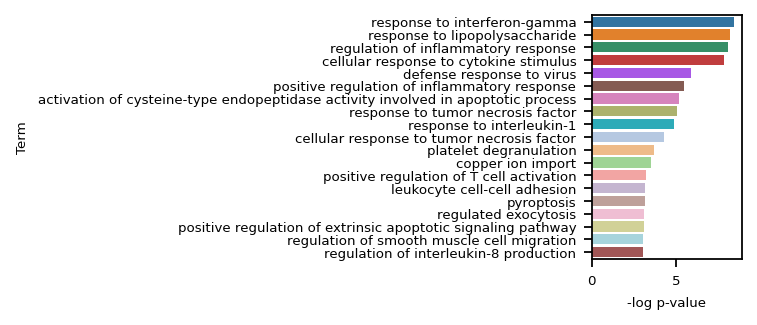

In [364]:
GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results = GO_results.iloc[[1,2,3,4,5,7,12,13,14,15,18,21,23,24,27,29,30,33,34,35],]
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]
print(GO_results)

sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(1.2,2.0))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[1:20], ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# plt.tight_layout()
# plt.show()
plt.savefig("figures/go_enrich_cxcl9_endo.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [343]:
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[1,"Genes"].split(";")], use_raw=True, score_name = 'endo_cytokine_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[7,"Genes"].split(";")], use_raw=True, score_name = 'endo_defense_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[15,"Genes"].split(";")], use_raw=True, score_name = 'endo_il1_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[24,"Genes"].split(";")], use_raw=True, score_name = 'endo_tcellactivation_score')

sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")], use_raw=True, score_name = 'endo_ifng_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[13,"Genes"].split(";")], use_raw=True, score_name = 'endo_endopeptidase_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[18,"Genes"].split(";")], use_raw=True, score_name = 'endo_tnf_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[27,"Genes"].split(";")], use_raw=True, score_name = 'endo_adhesion_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[29,"Genes"].split(";")], use_raw=True, score_name = 'endo_pyroptosis_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[30,"Genes"].split(";")], use_raw=True, score_name = 'endo_exocytosis_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")], use_raw=True, score_name = 'endo_apoptosis_activity_score') 

computing score 'endo_cytokine_activity_score'
    finished: added
    'endo_cytokine_activity_score', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)
computing score 'endo_defense_activity_score'
    finished: added
    'endo_defense_activity_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'endo_il1_activity_score'
    finished: added
    'endo_il1_activity_score', score of gene set (adata.obs).
    448 total control genes are used. (0:00:00)
computing score 'endo_tcellactivation_score'
    finished: added
    'endo_tcellactivation_score', score of gene set (adata.obs).
    397 total control genes are used. (0:00:00)
computing score 'endo_ifng_activity_score'
    finished: added
    'endo_ifng_activity_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'endo_endopeptidase_activity_score'
    finished: added
    'endo_endopeptidase_activity_score', s

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


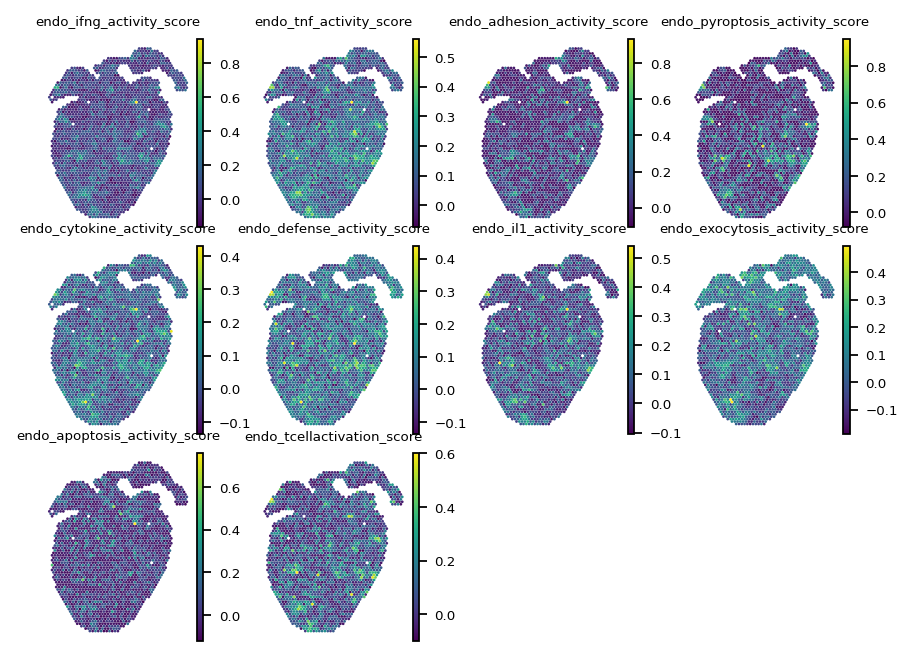

In [344]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.5,1.5), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", 'endo_tnf_activity_score', 'endo_adhesion_activity_score', 'endo_pyroptosis_activity_score', "endo_cytokine_activity_score", "endo_defense_activity_score", "endo_il1_activity_score", "endo_exocytosis_activity_score", "endo_apoptosis_activity_score", "endo_tcellactivation_score"], ncols=4, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


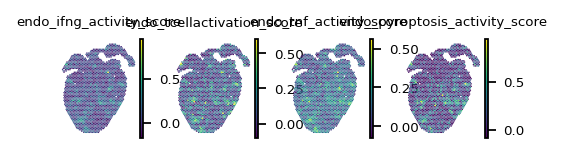

In [379]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", "endo_tcellactivation_score", 'endo_tnf_activity_score', 'endo_pyroptosis_activity_score'], 
              ncols=4, frameon=False, cmap="viridis",
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endo_spatial_module_scores.pdf")

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


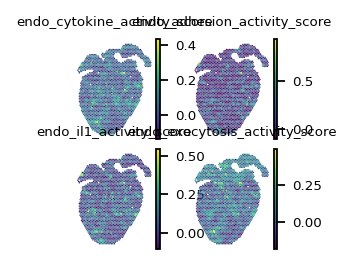

In [349]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_cytokine_activity_score", "endo_adhesion_activity_score", "endo_il1_activity_score", "endo_exocytosis_activity_score"], ncols=2, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endo_supp_spatial_modules.pdf")

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


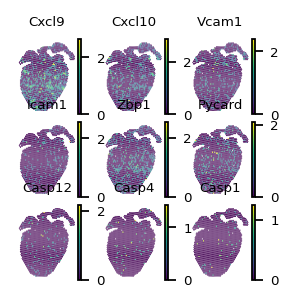

In [380]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.6,0.6), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["Cxcl9", "Cxcl10", "Vcam1", "Icam1", "Zbp1", "Pycard", "Casp12", "Casp4", "Casp1"], ncols=3, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endospatialfeatureplot.pdf")

In [ ]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=7, figsize=(1.5,1.5), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", 'endo_endopeptidase_activity_score', 'endo_tnf_activity_score', 'endo_adhesion_activity_score', 'endo_pyroptosis_activity_score', 'endo_exocytosis_activity_score', 'endo_apoptosis_activity_score'],
              ncols=1, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


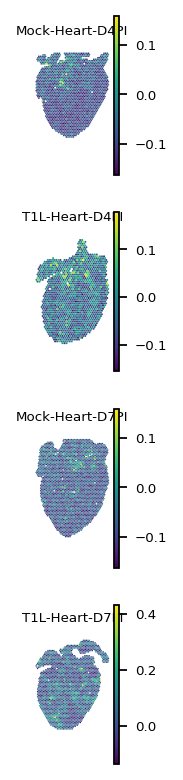

In [313]:
samples = ['Mock-Heart-D4PI', 'T1L-Heart-D4PI', 'Mock-Heart-D7PI', 'T1L-Heart-D7PI']
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize= (2,2.5), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
fig, axs = plt.subplots(4, 1, figsize=(1.0,5))
for i, library in enumerate(samples):
    ad = heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=samples[i],
        color="endo_endopeptidase_activity_score",
        size=1.5,
        scale_factor=1.0,
        show=False, cmap="viridis",
        ax=axs[i],
        frameon=False, title=samples[i]
    )
plt.tight_layout()
plt.savefig("figures/endo_endopeptidase_activity_score.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)